In [1]:
import numpy as np
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
X_train = np.load('X_train.npy')
X_eras = np.load('X_eras.npy')
y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [3]:
y_train.shape

(12288,)

In [4]:
params = {"n_estimators": 50,
          "learning_rate": 1,
          "max_depth": 10,
          "num_leaves": 2 ** 5,
          "colsample_bytree": 1}

model = LGBMRegressor(**params)

# train on all of train and save the model so we don't have to train next time
model.fit(X_train, y_train )

LGBMRegressor(colsample_bytree=1, learning_rate=1, max_depth=10,
              n_estimators=50, num_leaves=32)

In [5]:
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

[[1. 1.]
 [1. 1.]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6139
         1.0       1.00      1.00      1.00      6149

    accuracy                           1.00     12288
   macro avg       1.00      1.00      1.00     12288
weighted avg       1.00      1.00      1.00     12288



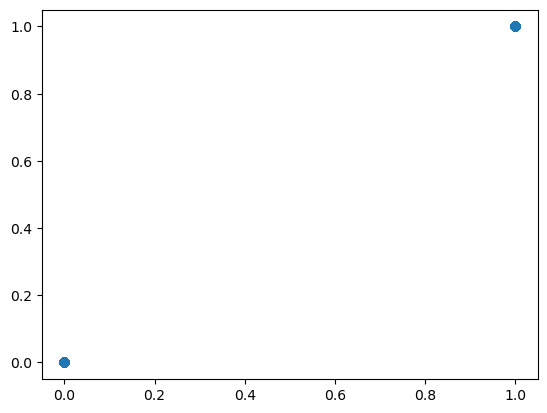

In [6]:
plt.scatter( preds_train, y_train)
print( np.corrcoef([ preds_train, y_train]) )
print( classification_report( y_train, np.clip( np.round( preds_train ),0,1) ) )

array([[ 1.        , -0.02156836],
       [-0.02156836,  1.        ]])

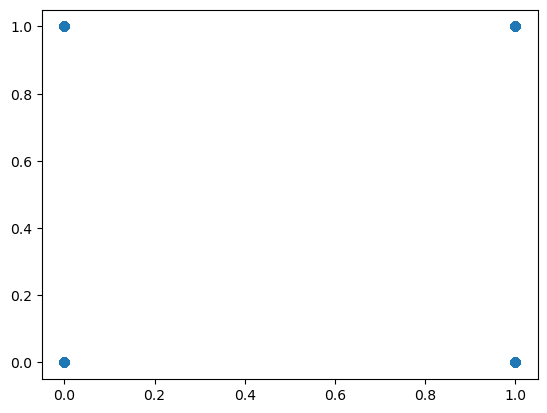

In [7]:
plt.scatter( preds_test, y_test)
np.corrcoef([ preds_test, y_test])

In [8]:
print( classification_report( y_test, np.clip( np.round( preds_test ),0,1) ) )

              precision    recall  f1-score   support

         0.0       0.49      0.43      0.46      1005
         1.0       0.49      0.55      0.52       995

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



In [37]:
"""Era Split Model"""
from sklearn.ensemble import EraHistGradientBoostingRegressor

era_model = EraHistGradientBoostingRegressor( 
    early_stopping=False, 
    boltzmann_alpha=0, 
    max_iter=50, 
    max_depth=10, 
    learning_rate=1, 
    colsample_bytree=1, 
    max_leaf_nodes = 32, 
    gamma=0, 
    blama=0, 
    era_boosting=False,
    gain_debug=False,
    vanna=0
)

In [38]:
era_model.fit(X_train, y_train, X_eras )

EraHistGradientBoostingRegressor(blama=0, boltzmann_alpha=0, colsample_bytree=1,
                                 early_stopping=False, gamma=0, learning_rate=1,
                                 max_depth=10, max_iter=50, max_leaf_nodes=32,
                                 vanna=0)

In [39]:
era_preds_train = era_model.predict(X_train)
era_preds_test = era_model.predict(X_test)

[[1.        0.4791228]
 [0.4791228 1.       ]]
              precision    recall  f1-score   support

         0.0       0.66      0.91      0.77      6139
         1.0       0.86      0.53      0.65      6149

    accuracy                           0.72     12288
   macro avg       0.76      0.72      0.71     12288
weighted avg       0.76      0.72      0.71     12288



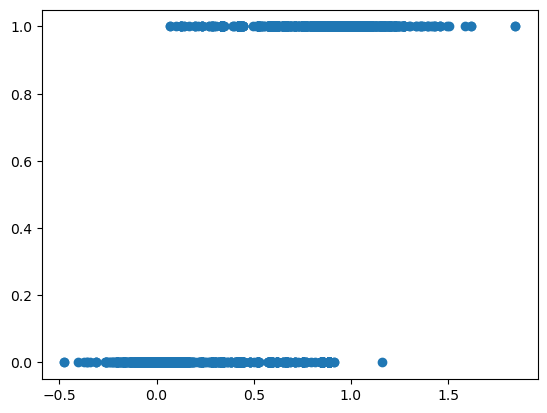

In [40]:
plt.scatter( era_preds_train, y_train)
print( np.corrcoef([np.round( era_preds_train ), y_train]) )
print( classification_report( y_train, np.clip( np.round( era_preds_train ),0,1) ) )

array([[1.        , 0.25369774],
       [0.25369774, 1.        ]])

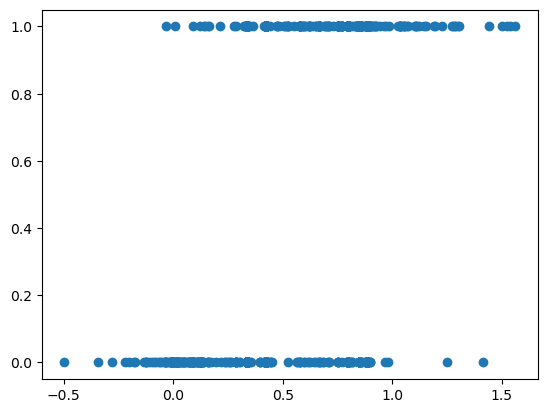

In [41]:
plt.scatter( era_preds_test, y_test)
np.corrcoef([era_preds_test, y_test])

In [42]:

print( classification_report( y_test, np.clip( np.round( era_preds_test ),0,1) ) )

              precision    recall  f1-score   support

         0.0       0.57      0.78      0.66      1005
         1.0       0.64      0.39      0.49       995

    accuracy                           0.59      2000
   macro avg       0.61      0.59      0.57      2000
weighted avg       0.60      0.59      0.57      2000



In [43]:
"""Directional Split Model"""
from sklearn.ensemble import EraHistGradientBoostingRegressor

d_era_model = EraHistGradientBoostingRegressor( 
    early_stopping=False, 
    boltzmann_alpha=0, 
    max_iter=50, 
    max_depth=10, 
    learning_rate=1, 
    colsample_bytree=1, 
    max_leaf_nodes = 32, 
    gamma=0, 
    blama=1, 
    era_boosting=False,
    gain_debug=False,
    vanna=0
)
d_era_model.fit(X_train, y_train, X_eras )

EraHistGradientBoostingRegressor(blama=1, boltzmann_alpha=0, colsample_bytree=1,
                                 early_stopping=False, gamma=0, learning_rate=1,
                                 max_depth=10, max_iter=50, max_leaf_nodes=32,
                                 vanna=0)

In [44]:
d_era_preds_train = d_era_model.predict(X_train)
d_era_preds_test = d_era_model.predict(X_test)

[[1.         0.98673095]
 [0.98673095 1.        ]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      6139
         1.0       0.99      1.00      0.99      6149

    accuracy                           0.99     12288
   macro avg       0.99      0.99      0.99     12288
weighted avg       0.99      0.99      0.99     12288



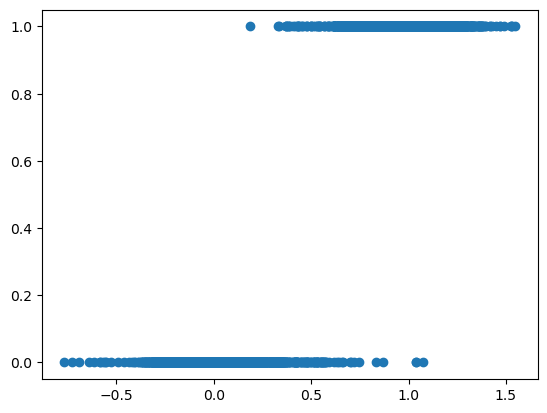

In [45]:
plt.scatter( d_era_preds_train, y_train)
print( np.corrcoef([np.round( d_era_preds_train ), y_train]) )
print( classification_report( y_train, np.clip( np.round( d_era_preds_train ),0,1) ) )

array([[1.        , 0.93207585],
       [0.93207585, 1.        ]])

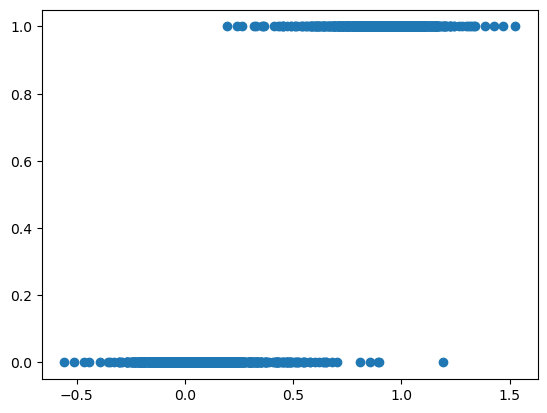

In [46]:
plt.scatter( d_era_preds_test, y_test)
np.corrcoef([d_era_preds_test, y_test])

In [47]:
print( classification_report( y_test, np.clip( np.round( d_era_preds_test ),0,1) ) )

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1005
         1.0       0.98      0.98      0.98       995

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



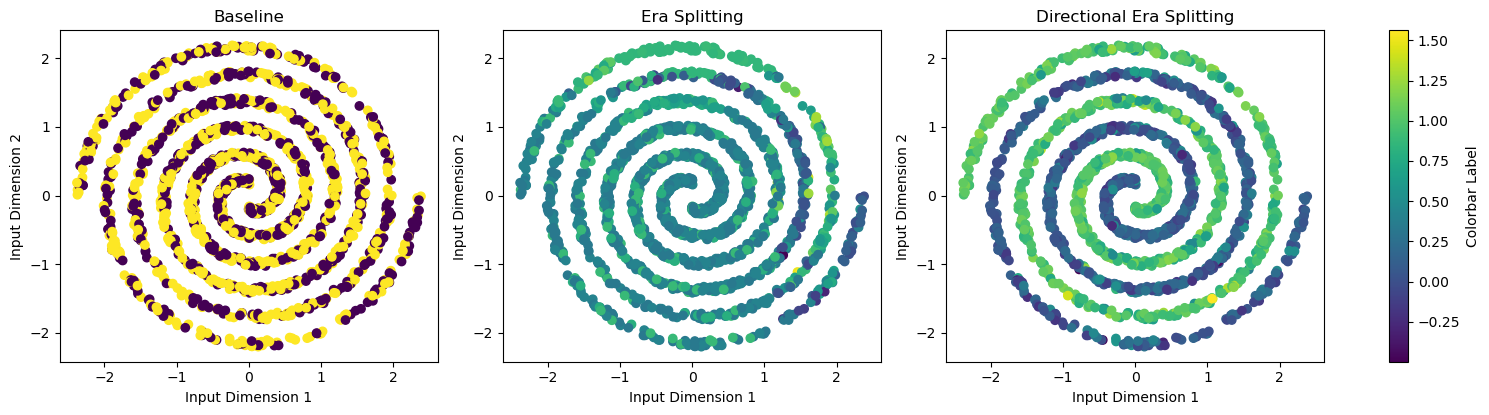

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Create a figure and grid specification
fig = plt.figure(figsize=(15, 4.25))
gs = GridSpec(1, 4, width_ratios=[1, 1, 1, 0.05])  # 4 columns: three subplots and a colorbar column

# Scatter plot for the first subplot
ax1 = plt.subplot(gs[0])
scatter1 = ax1.scatter(X_test[:, 0], X_test[:, 1], c=preds_test)
ax1.set_title("Baseline")
ax1.set_xlabel("Input Dimension 1")
ax1.set_ylabel("Input Dimension 2")

# Scatter plot for the second subplot
ax2 = plt.subplot(gs[1])
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 1], c=era_preds_test)
ax2.set_title("Era Splitting")
ax2.set_xlabel("Input Dimension 1")
ax2.set_ylabel("Input Dimension 2")

# Placeholder for the third subplot
ax3 = plt.subplot(gs[2])
scatter3 = ax3.scatter(X_test[:, 0], X_test[:, 1], c=d_era_preds_test)
ax3.set_title("Directional Era Splitting")
ax3.set_xlabel("Input Dimension 1")
ax3.set_ylabel("Input Dimension 2")

# Create a colorbar axis
cbar_ax = plt.subplot(gs[3])

# Add the colorbar to the colorbar axis
cbar = plt.colorbar(scatter2, cax=cbar_ax)
cbar.set_label('Colorbar Label')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig('decision_surface.png')

# Display the plot
plt.show()
